In [3]:
import pandas as pd

# Load the Excel dataset
df = pd.read_csv("netflix-699bb0d94f78e745148155.csv")

# Display first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Display some original date values
df['date_added'].head(10)

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
5    September 24, 2021
6    September 24, 2021
7    September 24, 2021
8    September 24, 2021
9    September 24, 2021
Name: date_added, dtype: object

In [5]:
# Display dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Summary statistics for numeric columns
df.describe()

# Summary statistics for categorical columns
df.describe(include="object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [7]:
# Count values in 'type' column
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [8]:
# Check missing values in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check number of rows after removing duplicates
df.shape

(8807, 12)

In [10]:
# Replace missing values with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')

In [11]:
# Convert date_added to datetime with specified format
df['date_added'] = pd.to_datetime(
    df['date_added'],
    format='%B %d, %Y',
    errors='coerce'
)
# Check for any remaining missing values
df.dtypes
df['date_added'].isnull().sum()

np.int64(98)

In [12]:
# Create year_added column
df['year_added'] = df['date_added'].dt.year.astype('Int64')

# convert month_added to nullable integer
df['month_added'] = df['date_added'].dt.month.astype('Int64')


# Display first 5 rows to verify new column
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [13]:
# Extract duration number
df['duration_int'] = df['duration'].str.extract('(\d+)')

# Convert duration to numeric
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')
# Convert duration_int to nullable integer
df['duration_int'] = df['duration_int'].astype('Int64')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_int
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,90
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,2


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count content types
type_counts = df['type'].value_counts()

type_counts

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

C:\Users\gomyx\AppData\Local\Temp\ipykernel_5844\2664290665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='magma', edgecolor='black')


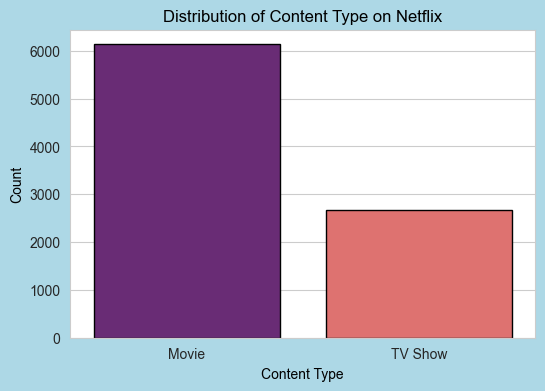

In [163]:
# Create bar plot for content type distribution
plt.figure(figsize=(6,4),facecolor='lightblue')
sns.countplot(data=df, x='type', palette='magma', edgecolor='black')

plt.title('Distribution of Content Type on Netflix', color='black')
plt.xlabel('Content Type', color='black')
plt.ylabel('Count', color='black')

plt.show()

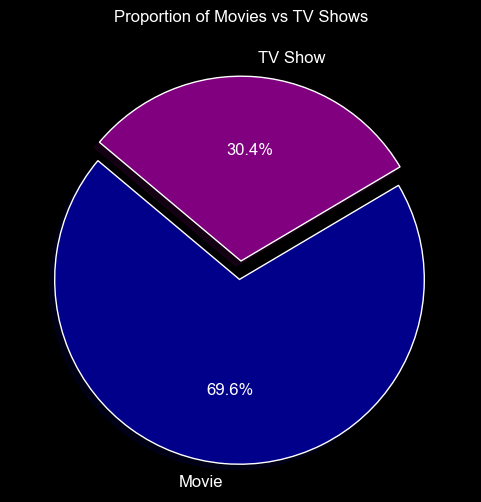

In [172]:
# Create pie chart
plt.figure(figsize=(6,6),facecolor='black',edgecolor='black')
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['darkblue', 'purple'], startangle=140, wedgeprops={'edgecolor': 'white'},explode=[0.1, 0],shadow=True,textprops={'color': 'white', 'fontsize': 12})

plt.title('Proportion of Movies vs TV Shows', color='white')

plt.show()
# The catalog is dominated by Movies, which suggests 
# that Netflix prioritizes film content. However, 
# TV Shows may drive long-term user engagement.

In [17]:
# Count values in rating column
rating_counts = df['rating'].value_counts()

rating_counts

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
Unknown        4
NC-17          3
UR             3
66 min         1
74 min         1
84 min         1
Name: count, dtype: int64

C:\Users\gomyx\AppData\Local\Temp\ipykernel_5844\502267722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index,palette='Set2',edgecolor='black')


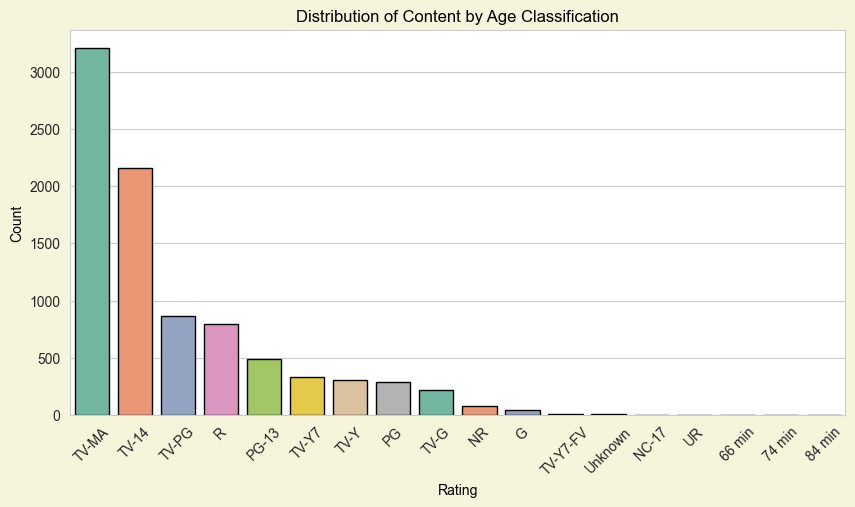

In [130]:
# Create bar chart for rating distribution
plt.figure(figsize=(10,5),facecolor='beige')
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index,palette='Set2',edgecolor='black')

plt.title('Distribution of Content by Age Classification', color='black')
plt.xlabel('Rating', color='black')
plt.ylabel('Count', color='black')

plt.xticks(rotation=45)
plt.show()
#The majority of Netflix content is classified as TV-MA, 
# indicating a strong focus on mature audiences.
#  This suggests that Netflix targets adult viewers more than children.

In [19]:
# Count number of contents added per year
year_counts = df['year_added'].value_counts().sort_index()

year_counts

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      10
2014      23
2015      73
2016     418
2017    1164
2018    1625
2019    1999
2020    1878
2021    1498
Name: count, dtype: Int64

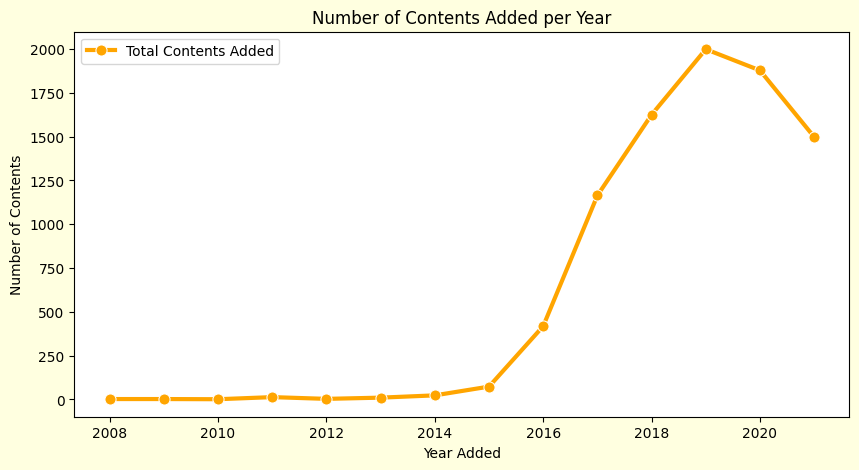

In [102]:
# Plot evolution of content added per year
plt.figure(figsize=(10,5),facecolor='lightyellow')
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='orange', label='Total Contents Added',lw=3,markersize=8)

plt.title('Number of Contents Added per Year', color='black')
plt.xlabel('Year Added', color='black')
plt.ylabel('Number of Contents', color='black')

plt.show()

In [21]:
# Create pivot table for type per year
type_year = df.groupby(['year_added', 'type']).size().unstack()

type_year

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,NaN
2010,1.0,NaN
2011,13.0,NaN
2012,3.0,NaN
2013,6.0,4.0
2014,19.0,4.0
2015,56.0,17.0
2016,253.0,165.0


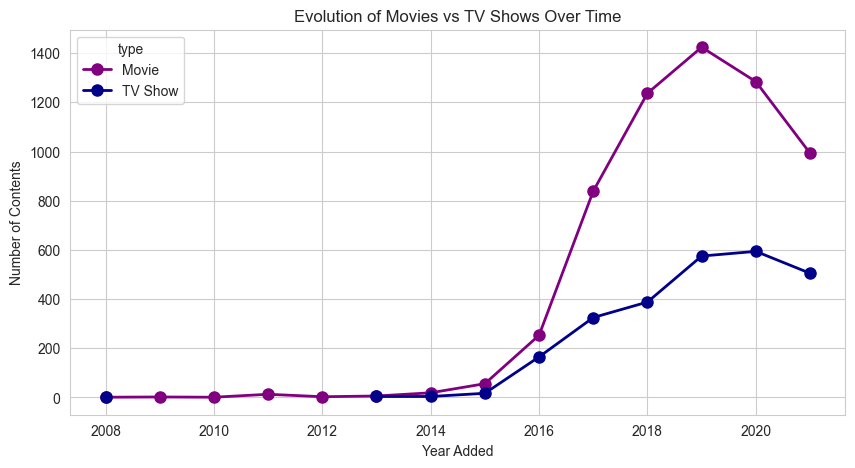

In [122]:
# Plot evolution by content type
type_year.plot(figsize=(10,5), marker='o',lw=2,markersize=8,color=['purple','darkblue'])
plt.title('Evolution of Movies vs TV Shows Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Contents')

plt.show()

In [23]:
# Create a temporary dataframe for country analysis
df_country = df.copy()

# Split country column
df_country['country'] = df_country['country'].str.split(', ')

# Explode to separate rows
df_country = df_country.explode('country')

In [24]:
# Get top 10 producing countries
top_countries = df_country['country'].value_counts().head(10)

top_countries

country
United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Name: count, dtype: int64

C:\Users\gomyx\AppData\Local\Temp\ipykernel_5844\4066465135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


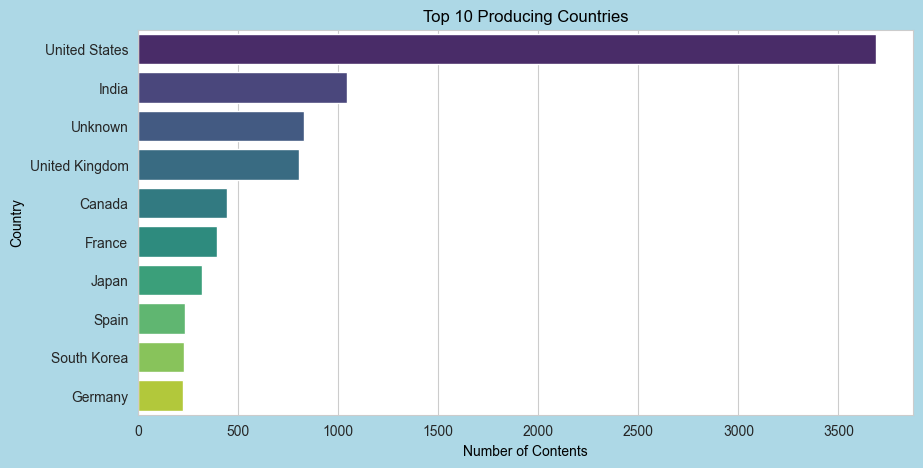

In [160]:
plt.figure(figsize=(10,5),facecolor='lightblue')
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')

plt.title('Top 10 Producing Countries', color='black')
plt.xlabel('Number of Contents', color='black')
plt.ylabel('Country', color='black')

plt.show()
#The United States dominates Netflix production,
#  but emerging markets like India and the UK contribute significantly, 
# showing Netflix’s global expansion strategy.

In [26]:
# Create a temporary dataframe for genre analysis
df_genre = df.copy()

# Split listed_in column
df_genre['listed_in'] = df_genre['listed_in'].str.split(', ')

# Explode genres
df_genre = df_genre.explode('listed_in')

In [27]:
# Get top 10 genres
top_genres = df_genre['listed_in'].value_counts().head(10)

top_genres

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

C:\Users\gomyx\AppData\Local\Temp\ipykernel_5844\2255019239.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma',edgecolor='white')


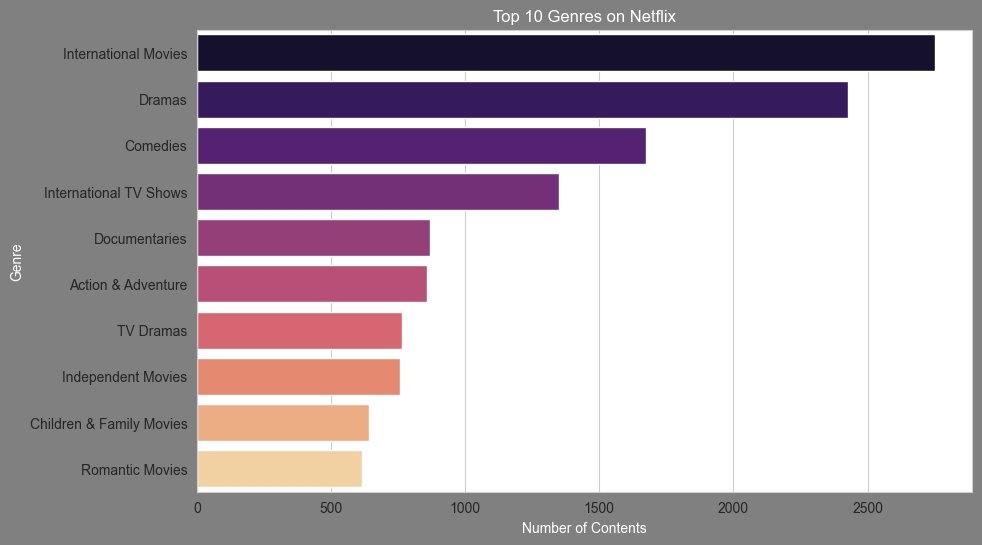

In [175]:
plt.figure(figsize=(10,6),facecolor='gray')
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma',edgecolor='white')

plt.title('Top 10 Genres on Netflix', color='white')
plt.xlabel('Number of Contents', color='white')
plt.ylabel('Genre', color='white')

plt.show()
#Drama and International Movies dominate the Netflix catalog,
#  indicating a strong focus on emotional
#  storytelling and global audience targeting.

In [29]:
# Group by type and genre
genre_type = df_genre.groupby(['type', 'listed_in']).size().reset_index(name='count')

# Show top 10 combinations
genre_type.sort_values(by='count', ascending=False).head(10)

,type,listed_in,count
11,Movie,International Movies,2752
7,Movie,Dramas,2427
4,Movie,Comedies,1674
25,TV Show,International TV Shows,1351
6,Movie,Documentaries,869
0,Movie,Action & Adventure,859
35,TV Show,TV Dramas,763
10,Movie,Independent Movies,756
2,Movie,Children & Family Movies,641
15,Movie,Romantic Movies,616
